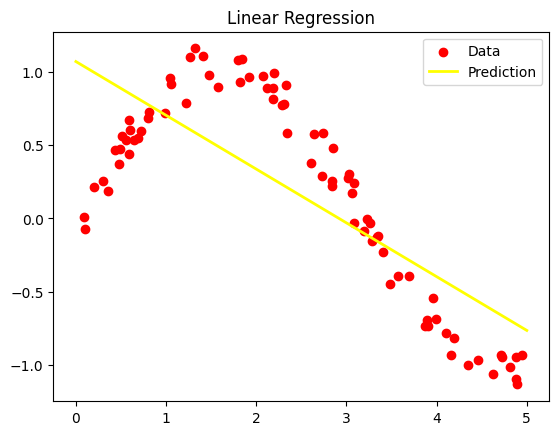

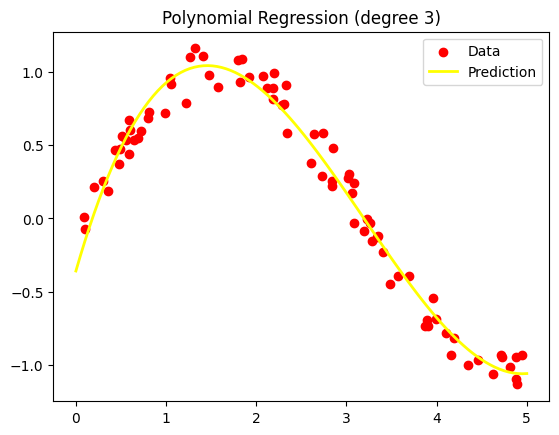

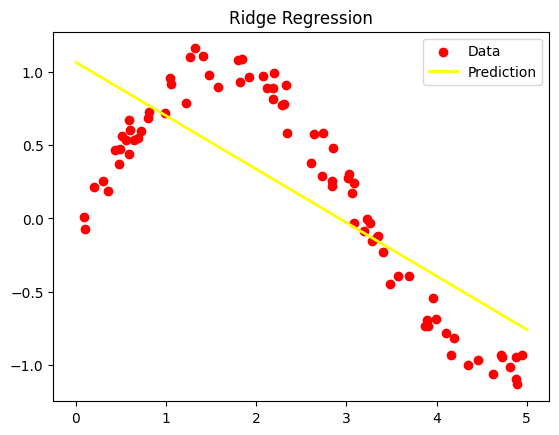

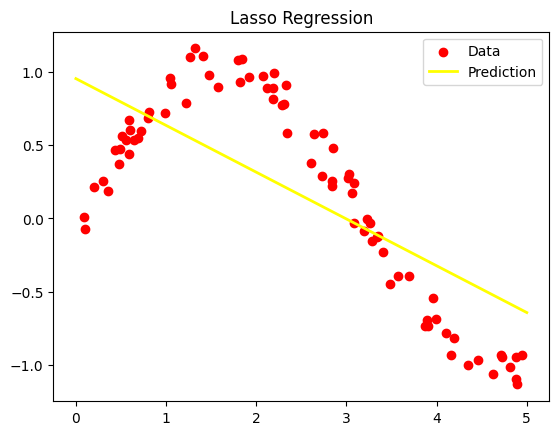

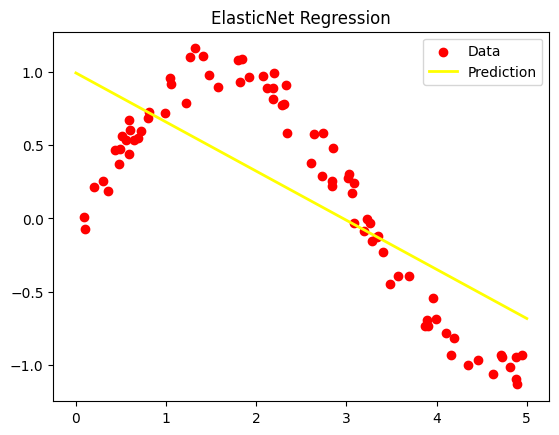

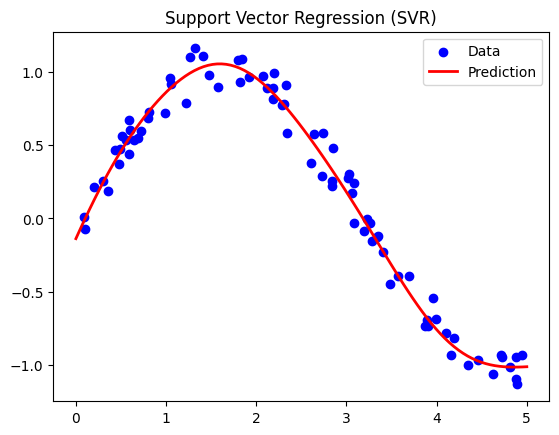

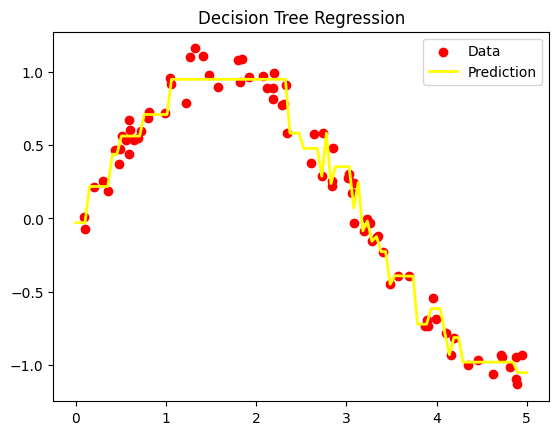

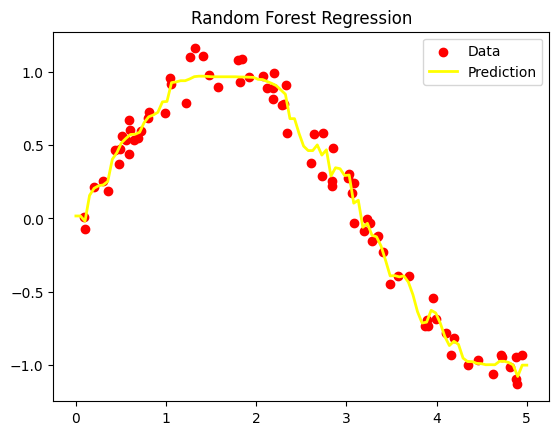

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

# Generating sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Define a function to plot predictions
def plot_regression(X, y, model, title):
    plt.scatter(X, y, color='red', label="Data")
    X_test = np.linspace(0, 5, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, color='yellow', linewidth=2, label="Prediction")
    plt.title(title)
    plt.legend()
    plt.show()

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
plot_regression(X, y, linear_model, "Linear Regression")

# 2. Polynomial Regression (degree 3)
poly_model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly_model.fit(X, y)
plot_regression(X, y, poly_model, "Polynomial Regression (degree 3)")

# 3. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)
plot_regression(X, y, ridge_model, "Ridge Regression")

# 4. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)
plot_regression(X, y, lasso_model, "Lasso Regression")

# 5. ElasticNet Regression
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_model.fit(X, y)
plot_regression(X, y, elasticnet_model, "ElasticNet Regression")

# 6. Support Vector Regression (SVR with RBF kernel)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_scaled, y_scaled)
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred = scaler_y.inverse_transform(svr_model.predict(scaler_X.transform(X_test)).reshape(-1, 1))

plt.scatter(X, y, color='blue', label="Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Prediction")
plt.title("Support Vector Regression (SVR)")
plt.legend()
plt.show()

# 7. Decision Tree Regression
tree_model = DecisionTreeRegressor(max_depth=5)
tree_model.fit(X, y)
plot_regression(X, y, tree_model, "Decision Tree Regression")

# 8. Random Forest Regression
forest_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
forest_model.fit(X, y)
plot_regression(X, y, forest_model, "Random Forest Regression")
